# Analysis of hydrogen exports and hydrogen infrastructure

In [5]:
import pes_analysis_helpers as ana
import pandas as pd
import pypsa
import matplotlib.pyplot as plt

Choose your root directory

In [6]:
root_directory = 'Thesis_Code'
ana.sets_path_to_root(root_directory)

This is the repository path:  /nfs/home/cas96273/Thesis_Code
Had to go 0 folder(s) up.


Choose one or multiple runs to be analyzed. In the latter case, you should declare respective variables. In the following, only one run is analyzed.

In [7]:
run_name = 'BR_2050_daily_07082023'

Read summary dataframe. If it does not exist yet it will be created and stored in ./pypsa-earth-sec/outputs

In [8]:
summary = ana.get_summary_df(run_name).set_index(['year', 'scenario', 'export_quantity'])

Creating summary dataframe for given run BR_2050_daily_07082023


FileNotFoundError: [Errno 2] No such file or directory: '/nfs/home/cas96273/Thesis_Code/pypsa-earth-sec/results/BR_2050_daily_07082023/postnetworks'

In [ ]:
summary_h2 = summary[['system_costs', 'system_costs_add_ex', 'exp_h2_cost_norm',
       'exp_h2_cost_norm_add_ex', 'exp_h2_cost_mp', 'electrolyzer_cap',
       'electrolyzer_cf', 'uhs_cap', 'pipeline_cap']]
summary_exp_ports = summary.filter(like=' H2 export ')

In [ ]:
summary_h2

system_costs  system_costs_add_ex  \
year scenario export_quantity                                      
2050 BS       0                1.202453e+11         1.514667e+11   
              10               1.211180e+11         1.524017e+11   
              100              1.278265e+11         1.598182e+11   
              500              1.607976e+11         1.960460e+11   
              1000             1.964865e+11         2.453241e+11   
              3000             3.405501e+11         4.761970e+11   
     AP       0                1.094545e+11         1.302777e+11   
              10               1.100022e+11         1.308684e+11   
              100              1.141256e+11         1.354281e+11   
              500              1.336381e+11         1.571463e+11   
              1000             1.537208e+11         1.864950e+11   
              3000             2.322732e+11         3.213957e+11   
     NZ       0                6.544287e+10         8.193888e+10   
              10               6.583918e+10         8.237036e+10   
              100              6.893606e+10         8.585858e+10   
              500              8.323967e+10         1.019679e+11   
              1000             9.743362e+10         1.233269e+11   
              3000             1.477001e+11         2.155396e+11   

                               exp_h2_cost_norm  exp_h2_cost_norm_add_ex  \
year scenario export_quantity                                              
2050 BS       0                        0.000000                 0.000000   
              10                       2.906012                 3.113533   
              100                      2.524528                 2.781050   
              500                      2.700784                 2.968986   
              1000                     2.538832                 3.125451   
              3000                     2.445383                 3.604507   
     AP       0                        0.000000                 0.000000   
              10                       1.824112                 1.966812   
              100                      1.555501                 1.715079   
              500                      1.610630                 1.789443   
              1000                     1.474070                 1.872035   
              3000                     1.363288                 2.121409   
     NZ       0                        0.000000                 0.000000   
              10                       1.319685                 1.436841   
              100                      1.163231                 1.305262   
              500                      1.185266                 1.333930   
              1000                     1.065292                 1.378220   
              3000                     0.913056                 1.482968   

                               exp_h2_cost_mp  electrolyzer_cap  \
year scenario export_quantity                                     
2050 BS       0                      0.000000      5.440348e+04   
              10                     3.156296      5.875350e+04   
              100                    2.871821      9.712993e+04   
              500                    3.108037      2.864816e+05   
              1000                   3.358075      5.313817e+05   
              3000                   4.735136      1.331982e+06   
     AP       0                      0.000000      2.915250e+05   
              10                     1.978225      2.965395e+05   
              100                    1.747131      3.396238e+05   
              500                    1.855133      5.418667e+05   
              1000                   1.979328      7.931756e+05   
              3000                   2.941185      1.608708e+06   
     NZ       0                      0.000000      3.772984e+05   
              10                     1.450024      3.823902e+05   
              100                    1.317386      4.281993e+05   
          

# Costs of hydrogen to be exported

### Average normalized costs

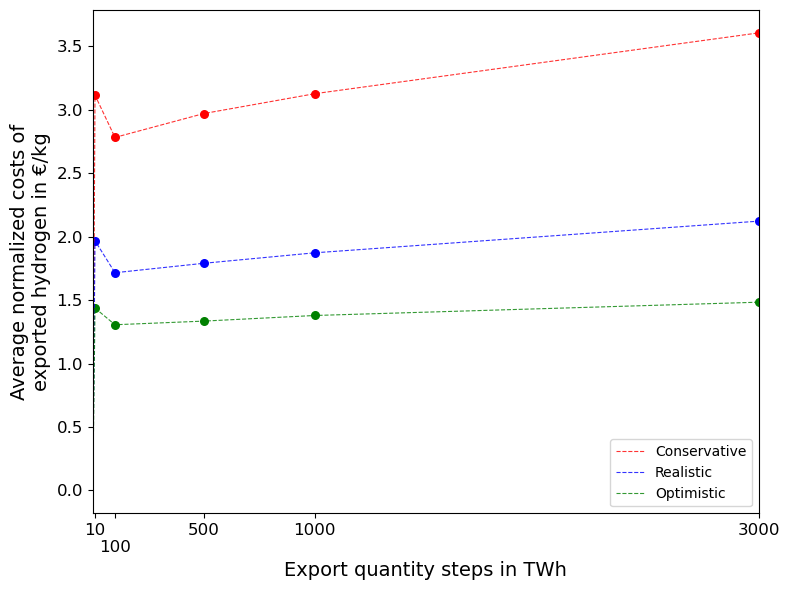

In [ ]:
ana.plot_average_h2_costs(summary)

### Marginal prices

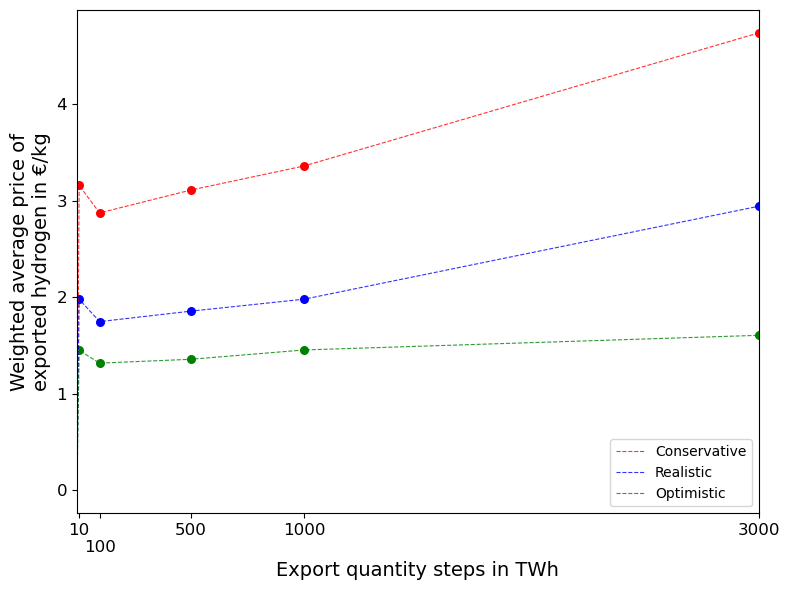

In [ ]:
ana.plot_h2_mp_exp(summary)

# Electrolyzer capacities

### Total capacities and export locations

In [ ]:
elec_cap = pd.concat([summary_h2.filter(like='electrolyzer_cap'), summary_exp_ports.filter(like='electrolyzer cap')], axis=1)

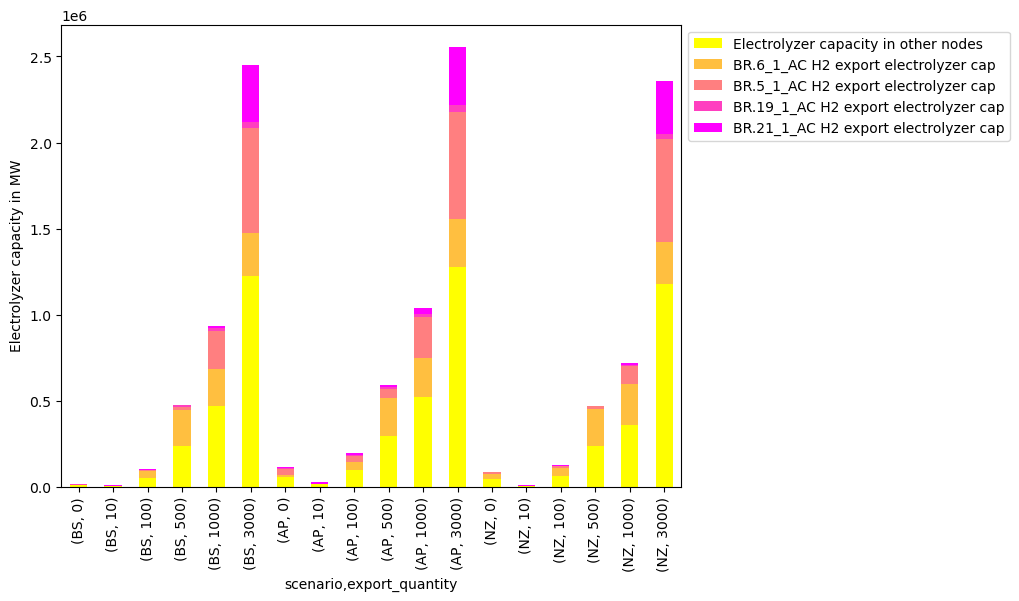

In [ ]:

ana.plot_electrolyzer_caps(elec_cap)

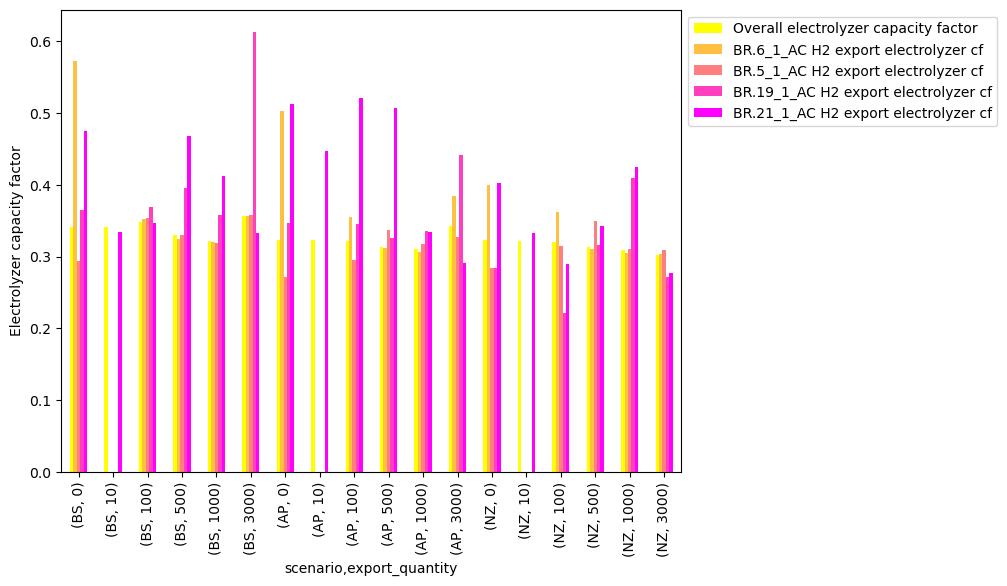

In [ ]:
ana.plot_electrolyzer_cf(summary)

# H2 delivery series

Networks need to be loaded to render the remaining outputs.

In [ ]:
ns = ana.get_networks(summary)

INFO:pypsa.io:Imported network elec_s_306_ec_lv1.05_Co2L_3H_2050_0.175_BS_0export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_306_ec_lv1.05_Co2L_3H_2050_0.175_BS_10export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_306_ec_lv1.05_Co2L_3H_2050_0.175_BS_100export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_306_ec_lv1.05_Co2L_3H_2050_0.175_BS_500export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_306_ec_lv1.05_Co2L_3H_2050_0.175_BS_1000export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_306_ec_lv1.05_Co2L_3H_2050_0.175_BS_3000export.nc

In [ ]:
ns[2050]['AP'][10].links.filter(like='export', axis=0)

,bus0,bus1,carrier,efficiency,p_nom_extendable,bus2,bus3,bus4,capital_cost,efficiency2,...,p_nom_min,p_nom_opt,charger_ratio,type,build_year,p_set,p_max_pu,terrain_factor,ramp_limit_up,ramp_limit_down
Link,,,,,,,,,,,,,,,,,,,,,
BR.21_1_AC H2 export,BR.21_1_AC H2,H2 export bus,H2,1.0,True,,,,0.0,1.0,...,0.0,5873.67713,NaN,,0,0.0,1.0,1.0,NaN,NaN


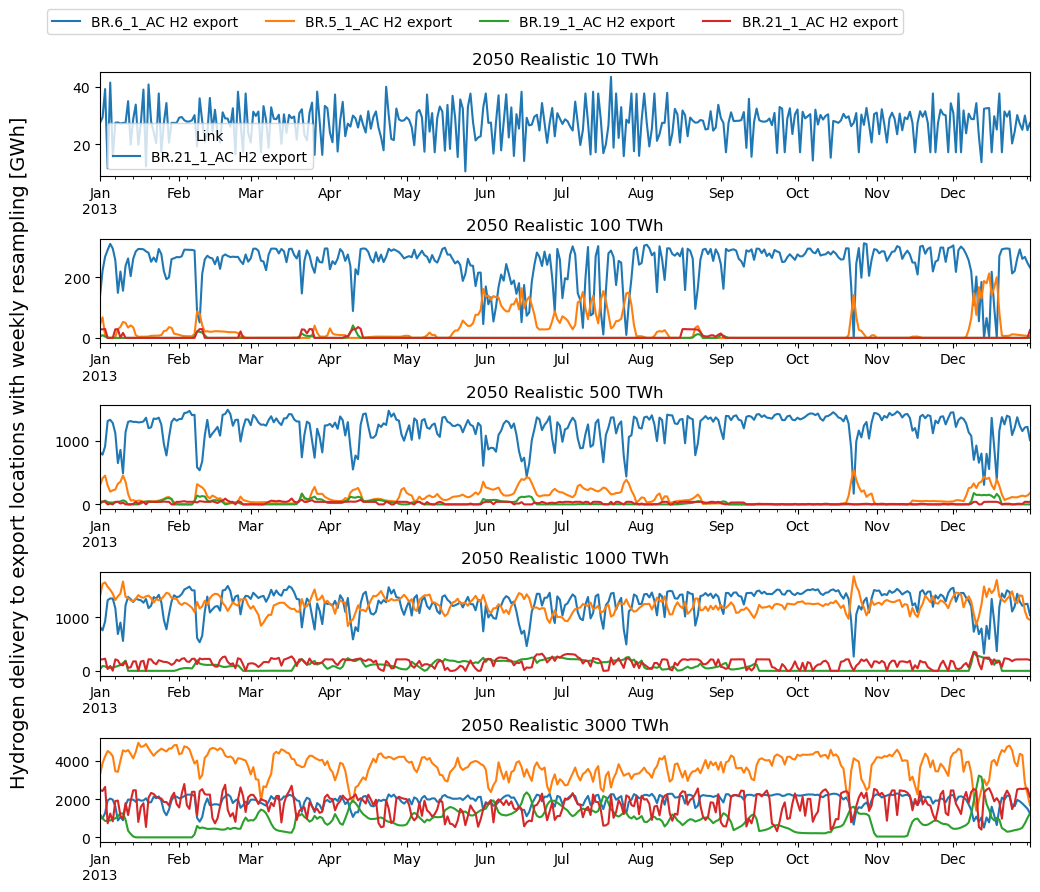

In [ ]:
ana.plot_h2_exports(ns, summary, 'D')

# Prices and export ports

ana.plot_h2_export_prices(ns, summary, 'D')

# H2 infrastructure plot

In [ ]:
ana.plot_h2_infra(ns[2050]['NZ'][500])

Link
H2 pipeline BR.7_1_AC -> BR.9_1_AC                 0.000000
H2 pipeline BR.5_1_AC -> BR.8_1_AC repurposed      0.000000
H2 pipeline BR.27_1_AC -> BR.9_1_AC repurposed     0.000000
H2 pipeline BR.26_1_AC -> BR.5_1_AC repurposed     0.000000
H2 pipeline BR.26_1_AC -> BR.2_1_AC repurposed     0.000000
H2 pipeline BR.10_1_AC -> BR.18_1_AC               0.000000
H2 pipeline BR.10_1_AC -> BR.27_1_AC               0.000000
H2 pipeline BR.19_1_AC -> BR.25_1_AC repurposed    0.000000
H2 pipeline BR.11_1_AC -> BR.25_1_AC               0.000000
H2 pipeline BR.5_1_AC -> BR.8_1_AC                 0.000000
H2 pipeline BR.19_1_AC -> BR.25_1_AC               0.000000
H2 pipeline BR.13_1_AC -> BR.8_1_AC                0.000000
H2 pipeline BR.21_1_AC -> BR.24_1_AC               0.000000
H2 pipeline BR.22_1_AC -> BR.4_1_AC                0.000000
H2 pipeline BR.26_1_AC -> BR.2_1_AC                0.000000
H2 pipeline BR.26_1_AC -> BR.5_1_AC                0.000000
H2 pipeline BR.27_1_AC -> BR.9_1_AC

/nfs/home/cas96273/.conda/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


# Underground hydrogen storages

### Capacities

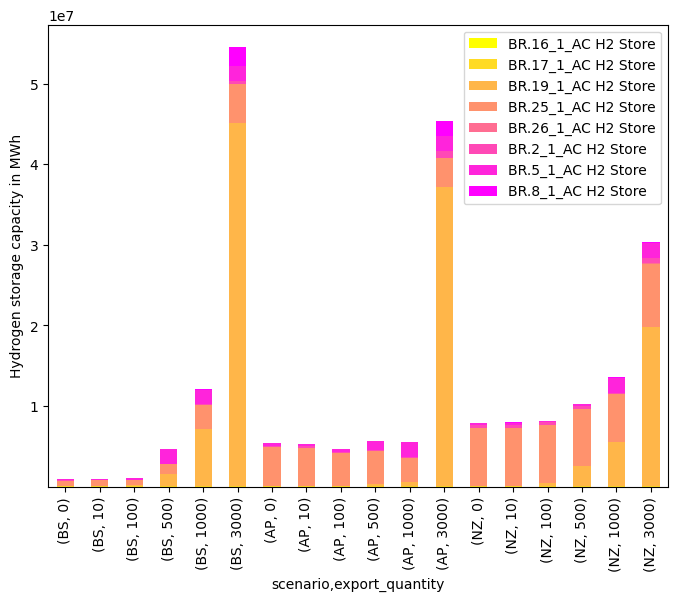

In [ ]:
ana.plot_uhs_caps(ns)